In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
labels=df['label']

In [4]:
labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.drop("label",1,inplace=True)

In [7]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()

In [10]:
data_std=sc.fit_transform(df)

In [11]:
data=data_std[0:1000,:]
label=labels[0:1000]

In [12]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
label

0      1
1      0
2      1
3      4
4      0
      ..
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 1000, dtype: int64

### Default Perplexity=30

In [14]:
model=TSNE(n_components=2,random_state=0)

In [15]:
tsne_data=model.fit_transform(data)

In [16]:
tsne_data=np.vstack((tsne_data.T,label)).T

In [17]:
tsne_data=pd.DataFrame(data=tsne_data,columns=['dim1','dim2','label'])

In [18]:
tsne_data

,dim1,dim2,label
0,1.004505,14.976868,1.0
1,19.457382,-35.805168,0.0
2,-8.251865,0.752885,1.0
3,-28.641768,-17.249672,4.0
4,21.980225,-43.257156,0.0
...,...,...,...
995,20.183308,21.432390,2.0
996,-22.497772,-8.795691,5.0
997,-36.467194,14.762012,9.0
998,43.222763,-6.056904,6.0


<Figure size 720x432 with 0 Axes>

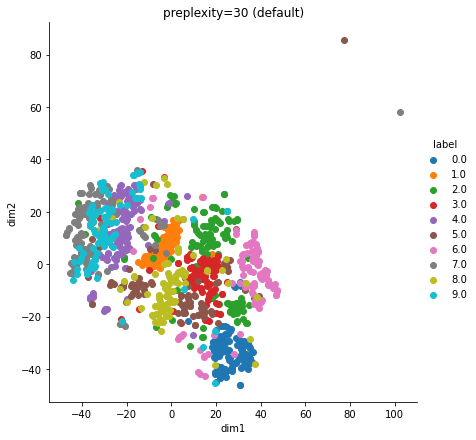

In [19]:
plt.figure(figsize=(10,6))
sns.FacetGrid(tsne_data,hue='label',size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.title("preplexity=30 (default)")
plt.show()

### Perplexity=50

In [20]:
model=TSNE(n_components=2,random_state=0,perplexity=50)

In [21]:
tsne_data=model.fit_transform(data)

In [22]:
tsne_data=np.vstack((tsne_data.T,label)).T

In [23]:
tsne_data=pd.DataFrame(tsne_data,columns=['dim1','dim2','label'])

In [24]:
tsne_data

,dim1,dim2,label
0,-3.033711,15.355862,1.0
1,22.883932,-16.755131,0.0
2,-1.627018,1.949764,1.0
3,-16.851236,-36.360691,4.0
4,28.859728,-20.055593,0.0
...,...,...,...
995,6.692528,33.975540,2.0
996,-4.670103,-7.064035,5.0
997,-24.756624,-11.966645,9.0
998,-13.376211,5.933630,6.0


<Figure size 576x432 with 0 Axes>

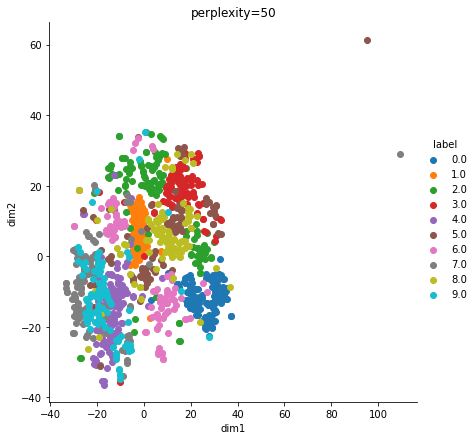

In [25]:
plt.figure(figsize=(8,6))
sns.FacetGrid(tsne_data,hue='label',size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.title("perplexity=50")
plt.show()

### Perplexity=50 n_iterations=5000

In [26]:
model=TSNE(n_components=2,perplexity=50,n_iter=5000,random_state=0)

In [27]:
tsne_data=model.fit_transform(data)

In [28]:
tsne_data=np.vstack((tsne_data.T,label)).T

In [29]:
tsne_data=pd.DataFrame(tsne_data,columns=['dim1','dim2','labels'])

In [30]:
tsne_data

,dim1,dim2,labels
0,-4.651960,17.779797,1.0
1,24.711273,-18.933510,0.0
2,-2.659027,3.147136,1.0
3,-15.850321,-40.426914,4.0
4,31.121405,-22.877226,0.0
...,...,...,...
995,8.981049,36.275993,2.0
996,-6.020093,-6.618591,5.0
997,-26.901302,-13.988337,9.0
998,-18.127016,9.850335,6.0


<Figure size 576x432 with 0 Axes>

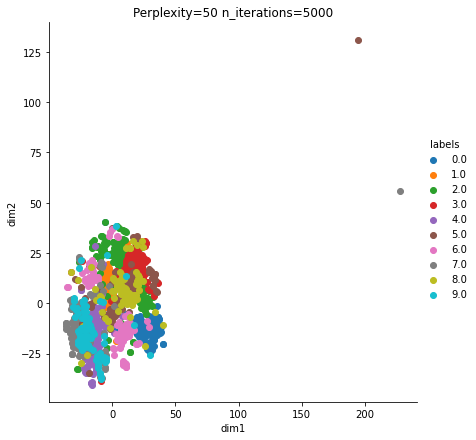

In [31]:
plt.figure(figsize=(8,6))
sns.FacetGrid(tsne_data,hue='labels',size=6).map(plt.scatter,"dim1",'dim2').add_legend()
plt.title("Perplexity=50 n_iterations=5000")
plt.show()

# Perplexity=2

In [32]:
model=TSNE(n_components=2,perplexity=2,random_state=0)

In [33]:
tsne_data=model.fit_transform(data)

In [34]:
tsne_data=np.vstack((tsne_data.T,label)).T

In [35]:
tsne_data=pd.DataFrame(tsne_data,columns=['dim1','dim2','labels'])

In [36]:
tsne_data

,dim1,dim2,labels
0,33.330082,13.651364,1.0
1,-52.290489,-34.290096,0.0
2,63.349026,52.617447,1.0
3,-36.436096,85.865768,4.0
4,-52.199974,-46.038788,0.0
...,...,...,...
995,-64.654839,36.412918,2.0
996,90.565697,6.920753,5.0
997,19.990450,-87.687508,9.0
998,-66.101776,59.758080,6.0


<Figure size 576x432 with 0 Axes>

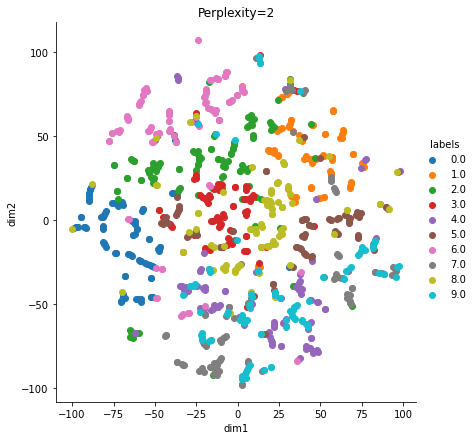

In [37]:
plt.figure(figsize=(8,6))
sns.FacetGrid(tsne_data,hue='labels',size=6).map(plt.scatter,"dim1",'dim2').add_legend()
plt.title("Perplexity=2")
plt.show()